In [146]:
from sklearn.datasets import load_digits as ld
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as ttSplit
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot
import numpy

In [147]:
DataSet = ld()

In [148]:
DataSet.data.shape

(1797, 64)

In [149]:
pcA = PCA(2)

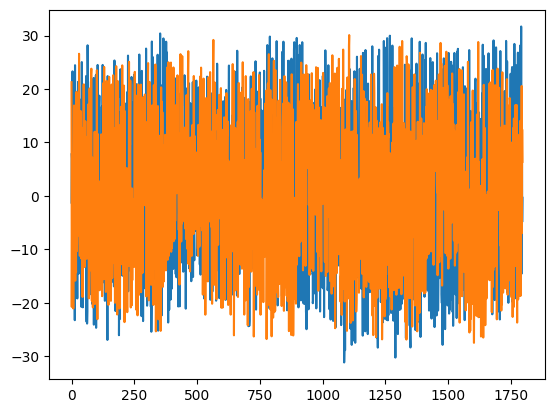

In [150]:
pcAData = pcA.fit_transform(DataSet.data)
pyplot.plot(pcAData)

In [151]:
sum(pcA.explained_variance_ratio_*100)

28.509364823692515

In [152]:
ClusterDataSet = ld()
ClusterDataSet.data = scale(ClusterDataSet.data)

In [153]:
Kmean = KMeans(init='k-means++',n_clusters=10,random_state=0)

In [154]:
data_train = pcA.fit_transform(ClusterDataSet.data)

In [155]:
TrainSet_train,TrainSet_test,TestSet_train,TestSet_test = ttSplit(data_train,ClusterDataSet.target,test_size=0.2)

In [156]:
Kmean.fit(TrainSet_train)
Label_K = Kmean.predict(TrainSet_test) 
cm = metrics.confusion_matrix(TestSet_test, Label_K)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [157]:
Cluster_center = Kmean.cluster_centers_ 

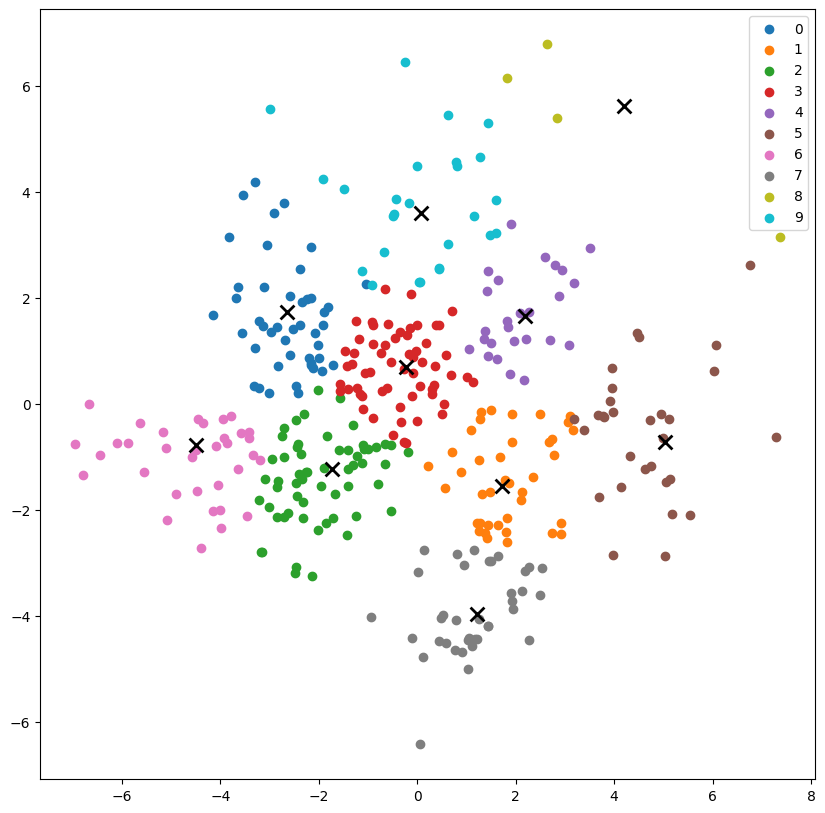

In [158]:
pyplot.figure(figsize=(10, 10)) 
for i in numpy.unique(Label_K): 
    pyplot.scatter(TrainSet_test[Label_K == i, 0], TrainSet_test[Label_K == i, 1], label=i) 
pyplot.scatter(Cluster_center[:, 0], Cluster_center[:, 1], marker='x', s=100, linewidths=2, color='k', zorder=10) 
pyplot.legend() 
pyplot.show()